In [1]:
#ex1
from sklearn.datasets import load_iris 
from sklearn.feature_selection import SelectKBest, chi2 

iris = load_iris()
X, y = iris.data, iris.target

selector = SelectKBest(chi2, k=2)

X_new = selector.fit_transform(X, y)

selected_feature_indices = selector.get_support(indices=True)

selected_feature_names = [iris.feature_names[i] for i in selected_feature_indices]
print("Selected features:", selected_feature_names)


Selected features: ['petal length (cm)', 'petal width (cm)']


Matplotlib is building the font cache; this may take a moment.


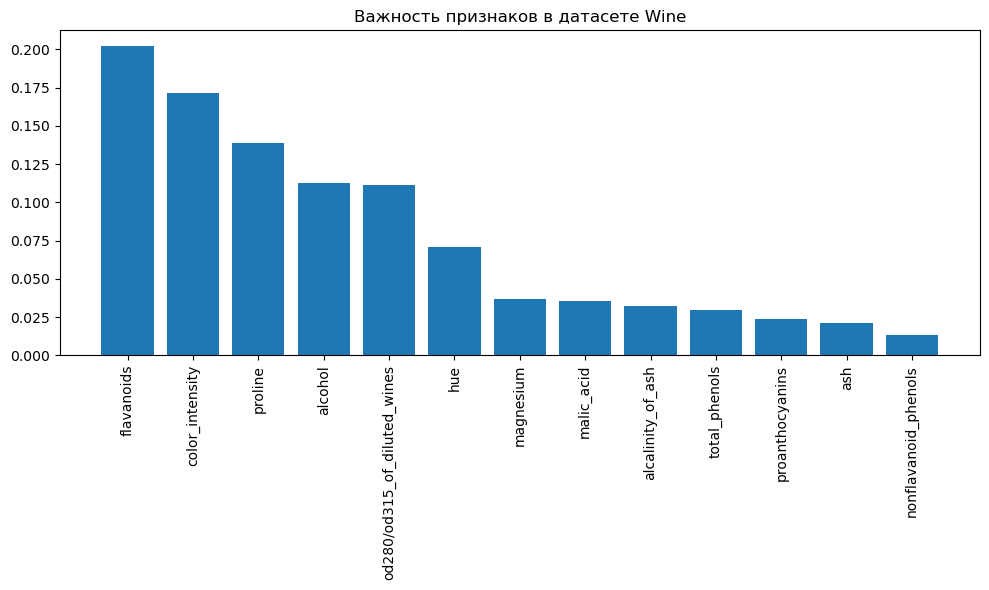

In [2]:
#ex2
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

wine = load_wine()
X, y = wine.data, wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)  # Обучаем модель на обучающих данных

importances = rf_classifier.feature_importances_
feature_names = wine.feature_names

feature_importance = sorted(zip(importances, feature_names), reverse=True)

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), [imp for imp, _ in feature_importance])
plt.xticks(range(len(importances)), [name for _, name in feature_importance], rotation=90)
plt.title("Важность признаков в датасете Wine")
plt.tight_layout()  
plt.show() 


In [3]:
#ex3
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(kernel="linear")

rfe = RFE(estimator=svm, n_features_to_select=10, step=1)

X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

svm.fit(X_train_rfe, y_train)

y_pred = svm.predict(X_test_rfe)

accuracy = accuracy_score(y_test, y_pred)

print("Выбранные признаки:", [cancer.feature_names[i] for i in range(len(rfe.support_)) if rfe.support_[i]])

print("Точность модели:", accuracy)

Выбранные признаки: ['mean radius', 'mean concavity', 'mean concave points', 'texture error', 'worst radius', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry']
Точность модели: 0.9736842105263158


In [4]:
#ex4
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score  # Для оценки модели

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train) 

selected_features = [diabetes.feature_names[i] for i in range(len(lasso.coef_)) if lasso.coef_[i] != 0]

y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("Выбранные признаки:", selected_features[1:])
print("Среднеквадратичная ошибка:", mse)
print("Коэффициент детерминации (R2):", r2)


Выбранные признаки: ['bmi', 'bp', 's1', 's3', 's5', 's6']
Среднеквадратичная ошибка: 2798.1934851697188
Коэффициент детерминации (R2): 0.4718547867276227
